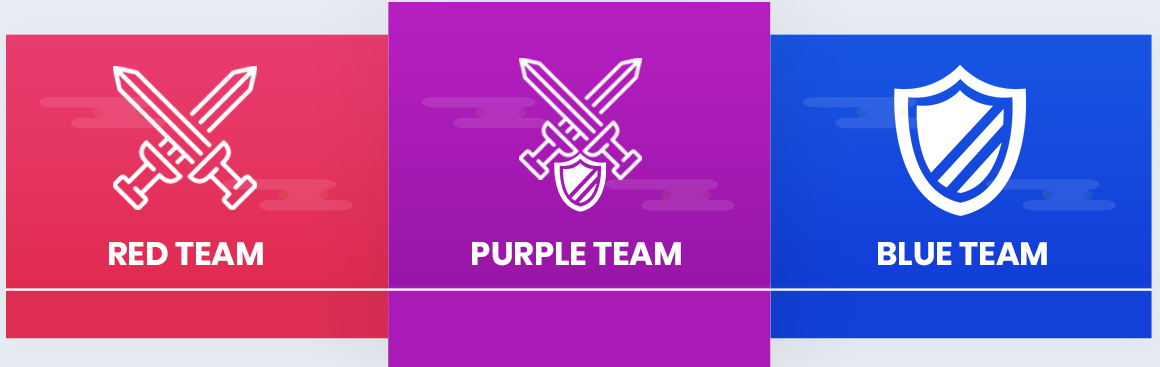

<a id="2"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
import liberaries
    </b>
        </span>
        </center>
</p>
</div>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns # for data visualization
sns.reset_defaults()

from keras import backend as K

from keras.layers import Input, Dense, Reshape, Flatten, Concatenate
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D,Conv1D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical


from keras.utils.vis_utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
from numpy.random import seed
seed(42)
tf.random.set_seed(42)

<a id="3"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
 load dataset
    </b>
        </span>
        </center>
</p>
</div>

In [ ]:
df=pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [ ]:
df['Ligitimacy'].value_counts()

1    12587
0     1897
Name: Ligitimacy, dtype: int64

In [ ]:
df=df.drop('ID',axis=1)

## scaling 

In [ ]:
#Scaling
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
scaler = StandardScaler()
X=scaler.fit_transform(X)


### split dataset 80% for training and 20% for testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(11587, 11)
(2897, 11)


<a id="4"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Fake task detection using classic ML algorithms
    </b>
        </span>
        </center>
</p>
</div>

### Random Forest model training

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Adaboost model training

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

### Verify detection performance

In [ ]:
def test_and_compare(models,x_test,y_test,labels1 = ['Fake', 'Legitimate' ],title='campare between models'):
  models_name=[]
  Accuracies=[]
  for model in models:
    print("Evaluated {} model".format(model))
    models_name.append(str(model))
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels1)
    disp.plot()
    plt.show()
    Accuracies.append(accuracy_score(y_test, y_pred)*100)
  plt.figure(figsize=(20,10))
  ax=sns.barplot(x=models_name, y=Accuracies)
  ax.set_title(title, size=26)
  counter=0
  for value in Accuracies:

    v=str(np.round(value,2))+' %'
    
    ax.text(counter,value,v, color='black', ha="center")
    counter+=1
  mi=min(Accuracies)
  ma=max(Accuracies)
  range=ma-mi
  
  plt.ylim(mi-(range), ma+range)
  plt.show()

Evaluated RandomForestClassifier() model
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       379
           1       0.99      1.00      1.00      2518

    accuracy                           1.00      2897
   macro avg       1.00      0.98      0.99      2897
weighted avg       1.00      1.00      1.00      2897



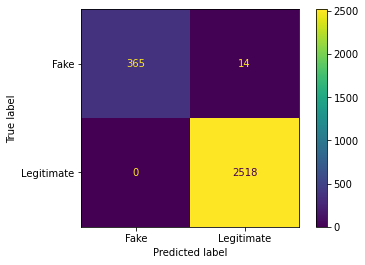

Evaluated AdaBoostClassifier(n_estimators=100, random_state=0) model
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       379
           1       0.97      0.98      0.98      2518

    accuracy                           0.96      2897
   macro avg       0.93      0.90      0.92      2897
weighted avg       0.96      0.96      0.96      2897



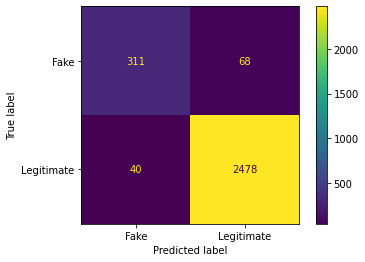

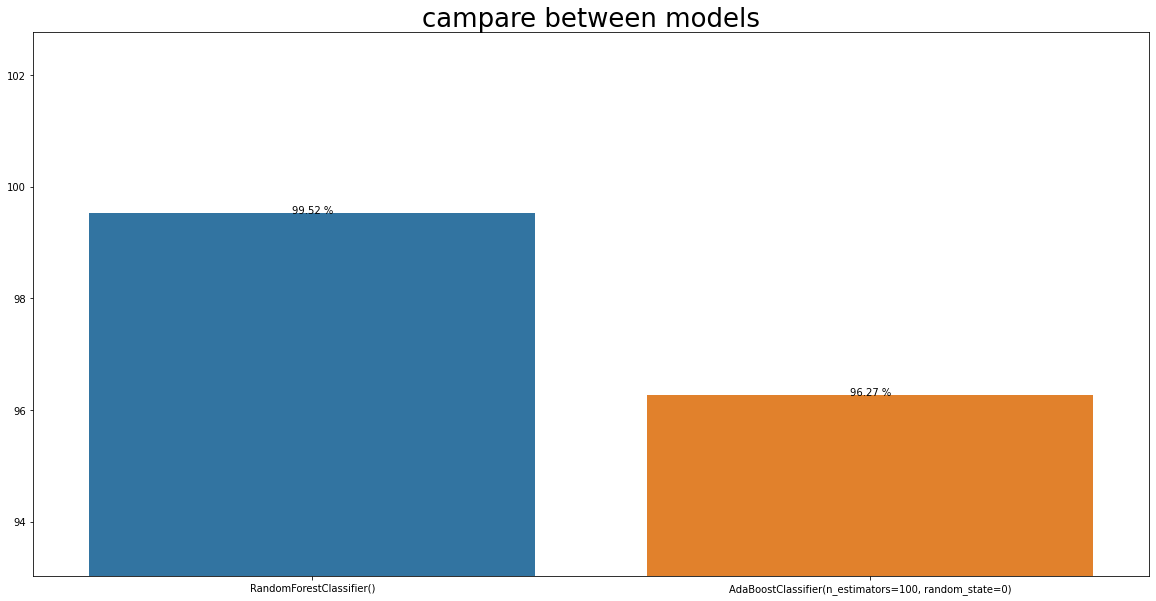

In [ ]:
test_and_compare([rf,adaboost],X_test,y_test)

<a id="5"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
build GAN model to generate fake task 
    </b>
        </span>
        </center>
</p>
</div>

### implement a CGAN model

In [ ]:
n_classes=2
batch_size = 64
num_channels = 1
row_size = 11
latent_dim = 128
dis_input=num_channels+n_classes
generator_in_channels=latent_dim+n_classes

In [ ]:
discriminator = keras.Sequential(
    [    
        keras.layers.InputLayer((11,dis_input)),
        keras.layers.Flatten(),
        #layers.Conv1D(64, 3, strides=2, padding="same"),
        #layers.LeakyReLU(alpha=0.2),
        #layers.GlobalMaxPooling1D(),

        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels)),
        layers.Dense(11 * generator_in_channels),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((11, generator_in_channels)),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(32),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(1, activation="sigmoid"),
        layers.Reshape((11, 1)),
    ],
    name="generator",
)

In [ ]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 33)                0         
                                                                 
 dense (Dense)               (None, 128)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25,025
Trainable params: 25,025
Non-trainable params: 0
_________________________________________________________________


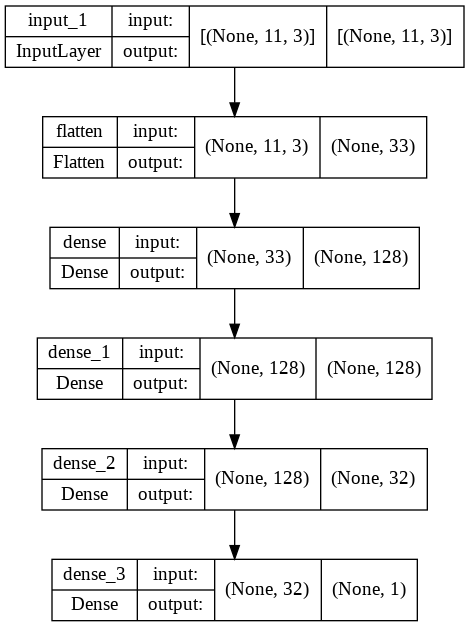

In [ ]:
plot_model(discriminator, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1430)              187330    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1430)              0         
                                                                 
 reshape (Reshape)           (None, 11, 130)           0         
                                                                 
 dense_5 (Dense)             (None, 11, 128)           16768     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 11, 128)           0         
                                                                 
 dense_6 (Dense)             (None, 11, 64)            8256      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 11, 64)            0 

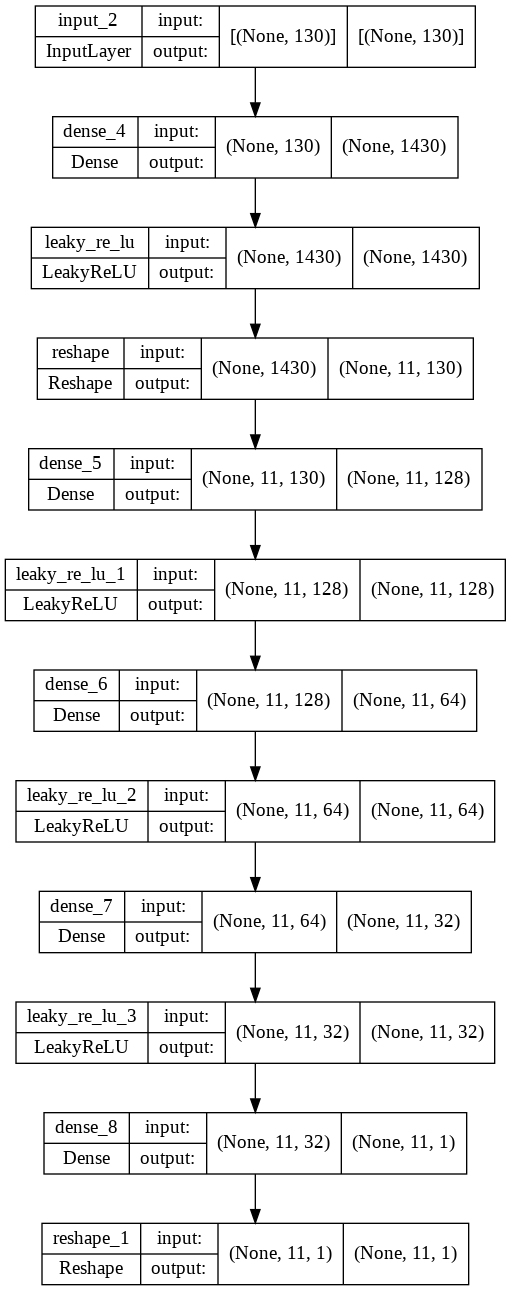

In [ ]:
plot_model(generator, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):

        real_data, one_hot_labels = data

        row_one_hot_labels = one_hot_labels[:, None, None]
        row_one_hot_labels = tf.repeat(
            row_one_hot_labels, repeats=[row_size]
        )
        row_one_hot_labels = tf.reshape(
            row_one_hot_labels, (-1, row_size, n_classes)
        )
        #    nx11x2
        batch_size = tf.shape(real_data)[0]
        #    n
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        #    nx128
        

        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )
        #  nx128 + nx2= nx130

        generated_row = self.generator(random_vector_labels)
        #   nx11X1

        fake_and_labels = tf.concat([generated_row, row_one_hot_labels], -1)

        # nx11x1 +nx11x2 =nx11x3
        real_and_labels = tf.concat([real_data, row_one_hot_labels], -1)
        # nx11x1 +nx11x2 =nx11x3
        combined_data = tf.concat(
            [fake_and_labels, real_and_labels], axis=0
        )
        # nx11x3
        labels = tf.concat(
            [tf.zeros((batch_size,1)),tf.ones((batch_size,1))], axis=0
        )
        # 2nx2
        # 0 for generator and 1 for real
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_data)
            d_loss = self.loss_fn(labels, predictions)
        # train discriminator
        
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )


        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat( 
            [random_latent_vectors, one_hot_labels], axis=1
        )

        #nx130

        misleading_labels = tf.ones((batch_size,1))
        # nx2 all ones
        with tf.GradientTape() as tape:
            fake_data = self.generator(random_vector_labels)
            fake_and_labels = tf.concat([fake_data, row_one_hot_labels], -1)
            predictions = self.discriminator(fake_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

### Apply the provided training dataset to CGAN

In [ ]:
# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = np.reshape(X_train, (-1, 11)).astype('float32')
all_digits=np.array(all_digits).reshape(-1,11,1)
all_labels = keras.utils.to_categorical(y_train, 2)
#all_labels=np.array(y_train,dtype="float32").reshape(-1,1)
# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_digits.shape}")
print(f"Shape of training labels: {all_labels.shape}")

Shape of training images: (11587, 11, 1)
Shape of training labels: (11587, 2)


In [ ]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.01),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

cond_gan.fit(dataset, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


182/182 [==============================] - 9s 27ms/step - g_loss: 6.6466 - d_loss: 0.1281
Epoch 2/20
182/182 [==============================] - 5s 27ms/step - g_loss: 9.9658 - d_loss: 2.4767e-04
Epoch 3/20
182/182 [==============================] - 5s 26ms/step - g_loss: 11.1259 - d_loss: 2.9026e-05
Epoch 4/20
182/182 [==============================] - 4s 24ms/step - g_loss: 11.8421 - d_loss: 1.5124e-05
Epoch 5/20
182/182 [==============================] - 4s 23ms/step - g_loss: 13.2368 - d_loss: 6.9236e-06
Epoch 6/20
182/182 [==============================] - 4s 23ms/step - g_loss: 15.4571 - d_loss: 2.5487e-06
Epoch 7/20
182/182 [==============================] - 4s 24ms/step - g_loss: 14.7519 - d_loss: 3.6103e-06
Epoch 8/20
182/182 [==============================] - 4s 23ms/step - g_loss: 14.8254 - d_loss: 3.0067e-06
Epoch 9/20
182/182 [==============================] - 4s 21ms/step - g_loss: 15.0579 - d_loss: 2.2230e-06
Epoch 10/20
182/182 [==============================] - 5s 26ms/

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


182/182 [==============================] - 8s 23ms/step - g_loss: 19.3692 - d_loss: 0.0073
Epoch 2/20
182/182 [==============================] - 4s 24ms/step - g_loss: 10.2485 - d_loss: 7.1293e-04
Epoch 3/20
182/182 [==============================] - 5s 25ms/step - g_loss: 11.0105 - d_loss: 3.8259e-05
Epoch 4/20
182/182 [==============================] - 4s 23ms/step - g_loss: 11.6966 - d_loss: 2.1398e-05
Epoch 5/20
182/182 [==============================] - 4s 23ms/step - g_loss: 12.5518 - d_loss: 6.0873e-06
Epoch 6/20
182/182 [==============================] - 4s 25ms/step - g_loss: 12.7494 - d_loss: 4.6696e-06
Epoch 7/20
182/182 [==============================] - 4s 24ms/step - g_loss: 12.8657 - d_loss: 4.3746e-06
Epoch 8/20
182/182 [==============================] - 4s 23ms/step - g_loss: 13.0440 - d_loss: 5.2743e-06
Epoch 9/20
182/182 [==============================] - 4s 22ms/step - g_loss: 13.3996 - d_loss: 3.3726e-06
Epoch 10/20
182/182 [==============================] - 4s 24m

### Generate synthetic fake tasks via Generator network in CGAN

In [ ]:
trained_gen = cond_gan.generator
trained_dic=cond_gan.discriminator
num_interpolation =   X_test.shape[0]

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))

interpolation_labels = keras.utils.to_categorical([1]*num_interpolation, 2)
interpolation_labels = tf.reshape(interpolation_labels, (num_interpolation, 2))
noise_and_labels = tf.concat([interpolation_noise, interpolation_labels], axis=1)

fake = trained_gen.predict(noise_and_labels)

<a id="5"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
use fake task generated by gan to attack the model  
    </b>
        </span>
        </center>
</p>
</div>

### Mix the generated fake tasks with the original test 

In [ ]:
mixed_data=np.concatenate((np.array(X_test), fake.reshape(-1,11)), axis=0)
mixed_y=np.concatenate((np.array(y_test), [0]*y_test.shape[0]), axis=0)

In [ ]:
mixed_data.shape

(5794, 11)

In [ ]:
mixed_y.shape

(5794,)

### Obtain Adaboost and RF detection performance using the new test dataset

Evaluated RandomForestClassifier() model
              precision    recall  f1-score   support

           0       1.00      0.58      0.74      3276
           1       0.65      1.00      0.79      2518

    accuracy                           0.76      5794
   macro avg       0.82      0.79      0.76      5794
weighted avg       0.85      0.76      0.76      5794



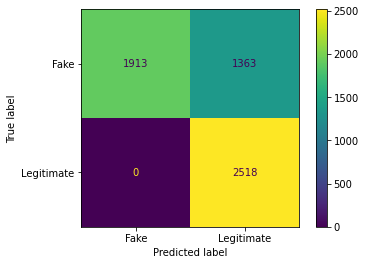

Evaluated AdaBoostClassifier(n_estimators=100, random_state=0) model
              precision    recall  f1-score   support

           0       0.89      0.09      0.17      3276
           1       0.46      0.98      0.62      2518

    accuracy                           0.48      5794
   macro avg       0.67      0.54      0.40      5794
weighted avg       0.70      0.48      0.37      5794



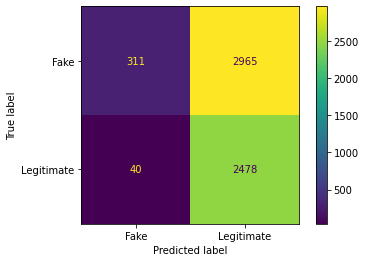

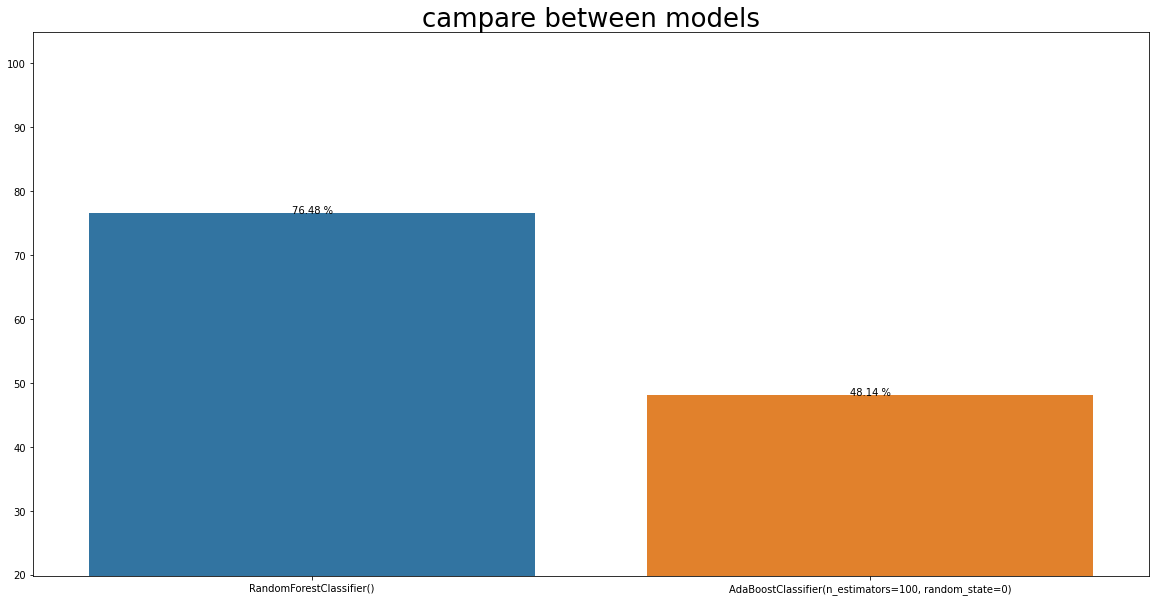

In [ ]:
test_and_compare([rf,adaboost],mixed_data,mixed_y)

<a id="5"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
cascade detection framework to prodect the model  
    </b>
        </span>
        </center>
</p>
</div>

## Test the discriminator

In [ ]:
y_true_pred=np.concatenate([[1]*y.shape[0],[0]*fake.shape[0]])
y_true_pred.shape

(17381,)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00     14484

    accuracy                           1.00     17381
   macro avg       1.00      1.00      1.00     17381
weighted avg       1.00      1.00      1.00     17381



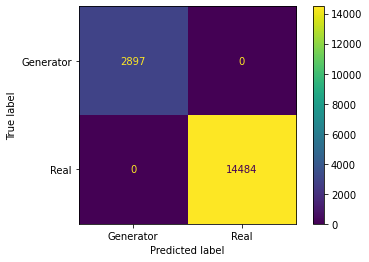

In [ ]:
rows = np.reshape(X, (-1, 11)).astype('float32')
rows = np.array(rows).reshape(-1,11,1)
all_labels = keras.utils.to_categorical(y, 2)


one_hot_labels = all_labels[:, None, None]

one_hot_labels = tf.repeat(
    one_hot_labels, repeats=[row_size]
)

one_hot_labels = tf.reshape(
    one_hot_labels, (-1, row_size, n_classes)
)
# N X 11 X n
data_and_labels = tf.concat([rows, one_hot_labels], -1)

all_labels = keras.utils.to_categorical([0]*fake.shape[0], 2)


one_hot_labels = all_labels[:, None, None]

one_hot_labels = tf.repeat(
    one_hot_labels, repeats=[row_size]
)

one_hot_labels = tf.reshape(
    one_hot_labels, (-1, row_size, n_classes)
)

fake_and_labels = tf.concat([fake,one_hot_labels], -1)

# nx11x1 +nx11x2 =nx11x3

combined_data = tf.concat(
    [data_and_labels,fake_and_labels], axis=0
)

fake_test=trained_dic.predict(combined_data) 

y_pred=np.array([ 1 if x>0.5 else 0 for x in fake_test])
print(classification_report(y_true_pred, y_pred))
cm = confusion_matrix(y_true_pred, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Generator','Real'])
disp.plot()
plt.show()


In [ ]:
def cascade_detection_framework(models,trained_dic,X,Y):
  rows = np.reshape(X, (-1, 11)).astype('float32')
  rows = np.array(rows).reshape(-1,11,1)
  all_labels = keras.utils.to_categorical(Y, 2)


  one_hot_labels = all_labels[:, None, None]

  one_hot_labels = tf.repeat(
      one_hot_labels, repeats=[row_size]
  )

  one_hot_labels = tf.reshape(
      one_hot_labels, (-1, row_size, n_classes)
  )
  # N X 11 X 2
  data_and_labels = tf.concat([rows, one_hot_labels], -1)
  fake_test=trained_dic.predict(data_and_labels) 

  y_pred=np.argmax(fake_test,axis=1)
  y_pred=np.array([ 1 if x>0.5 else 0 for x in fake_test])
  x_real=X[y_pred==1]
  y_real=Y[y_pred==1]

  test_and_compare(models,x_real,y_real)


Evaluated RandomForestClassifier() model
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       379
           1       0.99      1.00      1.00      2518

    accuracy                           1.00      2897
   macro avg       1.00      0.98      0.99      2897
weighted avg       1.00      1.00      1.00      2897



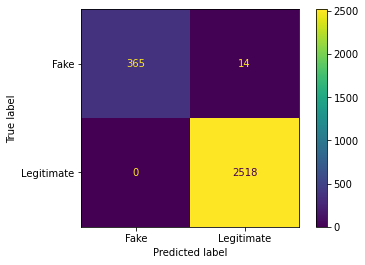

Evaluated AdaBoostClassifier(n_estimators=100, random_state=0) model
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       379
           1       0.97      0.98      0.98      2518

    accuracy                           0.96      2897
   macro avg       0.93      0.90      0.92      2897
weighted avg       0.96      0.96      0.96      2897



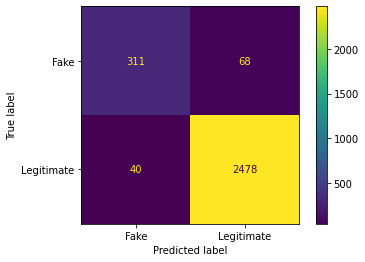

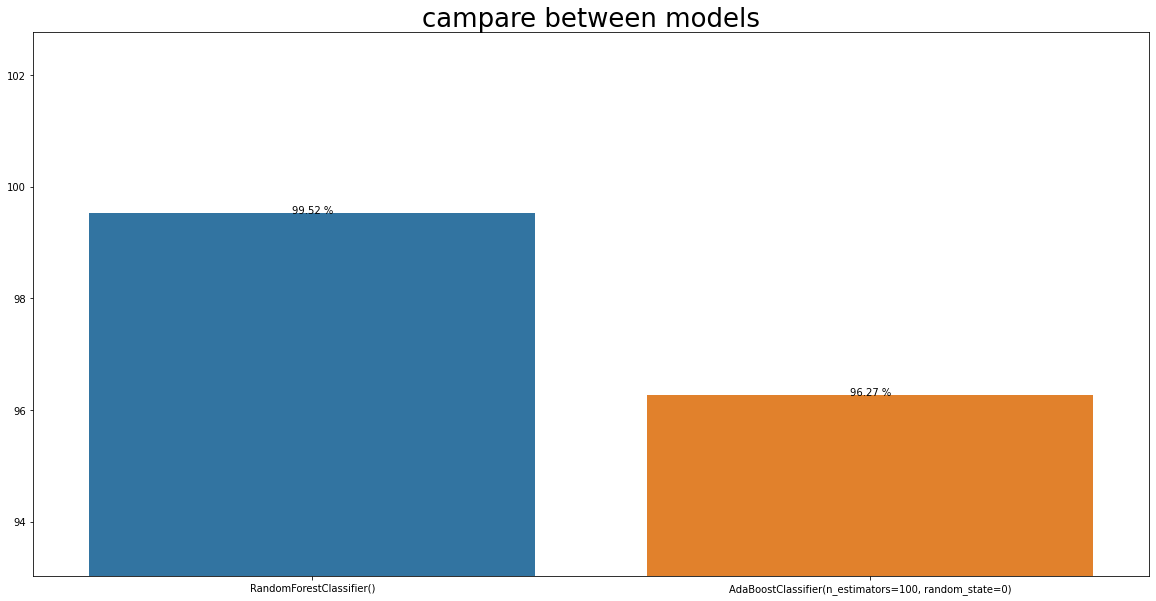

In [ ]:
trained_dic=cond_gan.discriminator
cascade_detection_framework([rf,adaboost],trained_dic,mixed_data,mixed_y)

# _______________________________________________________________Thanks________________________________ 